<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas - `DataFrame`s

Probably the most important data structure of pandas is the `DataFrame`. It's a tabular structure tightly integrated with `Series`.

### Loading data from google drive into pandas dataframe

In [122]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Connecting to Google Drive 
Sign-in using your Gmail account

In [123]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [124]:
df = pd.read_csv(
    "https://people.ucsc.edu/~cchakrab/data/auto-mpg.csv",
    na_values=['NA','?'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


##### Getting Aggregate Information about our Dataset

In [126]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##### Check if any of the columns has Nan values

In [127]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

##### Generate mask for identifying rows with Nan values

In [128]:
mask = df['horsepower'].isnull()
mask

0      False
1      False
2      False
3      False
4      False
       ...  
393    False
394    False
395    False
396    False
397    False
Name: horsepower, Length: 398, dtype: bool

##### Show the rows having Nan values

In [129]:
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


##### Create a new column filling Nan values with mean of the column

In [130]:
mean = df['horsepower'].mean()
df['horsepower_filled'] = df['horsepower'].fillna(mean)
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_filled
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto,104.469388
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick,104.469388
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe,104.469388
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra,104.469388
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i,104.469388
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl,104.469388


##### Drop the newly created column

In [131]:
df.drop('horsepower_filled',1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


##### However, the original dataframe has not been changed

In [132]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower_filled
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,130.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,165.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,150.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,150.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,140.0


##### How to drop the columns from original dataframe?

In [133]:
df.drop('horsepower_filled',1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


##### Drop the rows with Nan values

In [134]:
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [135]:
df.dropna(subset = ['horsepower'],inplace = True)
df[mask]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name


### Visualizing data
Use matplotlib/seaborn to visualize the data

In [136]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [137]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Text(0, 0.5, 'weight')

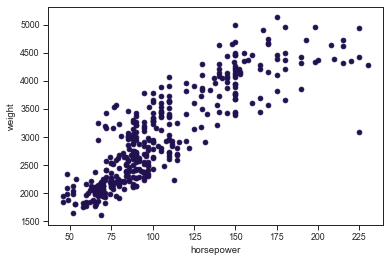

In [138]:
plt.scatter(df['horsepower'],df['weight'])
plt.xlabel('horsepower')
plt.ylabel('weight')

<BarContainer object of 392 artists>

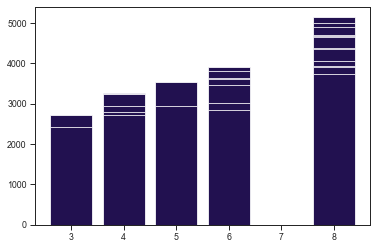

In [139]:
plt.bar(df['cylinders'],df['weight'])

### Seaborn 
Built on top of matplotlib

### Matplotlib vs Seaborn
1. Matplotlib makes easy things easy and hard things possible.
2. Seaborn tries to make a well-defined set of hard things easy too.
<br>

#### Two major problems faced by Matplotlib
   * Default Matplotlib parameters
   * Working with data frames
   
 #### Important Features of Seaborn
* Built in themes for styling matplotlib graphics
* Visualizing univariate and bivariate data
* Fitting in and visualizing linear regression models
* Plotting statistical time series data
* Seaborn works well with NumPy and Pandas data structures
* It comes with built in themes for styling Matplotlib graphics


<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

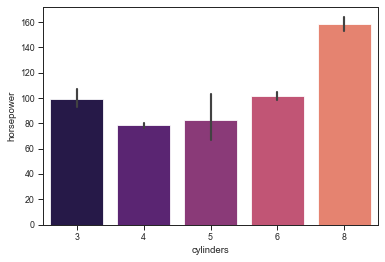

In [140]:
sb.barplot(df['cylinders'],df['horsepower'])

##### Basically, Seaborn splits the Matplotlib parameters into two groups

* Plot styles
* Plot scale

### Seaborn Figure Styles
The interface for manipulating the styles is set_style(). Using this function you can set the theme of the plot. Seaborn has five themes available.

* Darkgrid
* Whitegrid
* Dark
* White
* Ticks

##### Example:

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

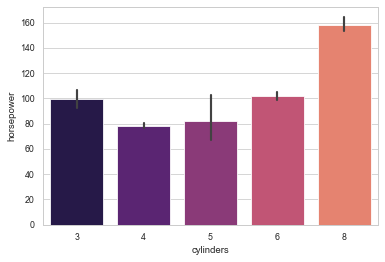

In [141]:
sb.set_style("whitegrid")
sb.barplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

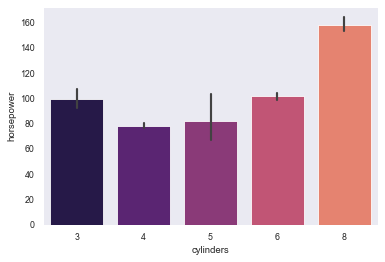

In [142]:
sb.set_style("dark")
sb.barplot(df['cylinders'],df['horsepower'])

##### Scaling Plot Elements
We also have control on the plot elements and can control the scale of plot using the set_context() function. We have four preset templates for contexts, based on relative size, the contexts are named as follows

* Paper
* Notebook
* Talk
* Poster

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

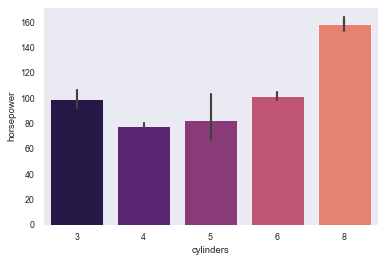

In [143]:
sb.set_context("paper")
sb.barplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

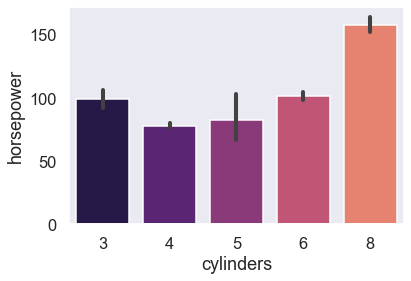

In [144]:
sb.set_context("talk")
sb.barplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

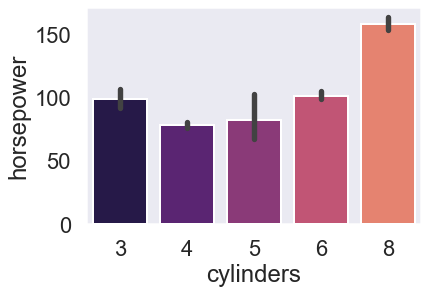

In [145]:
sb.set_context("poster")
sb.barplot(df['cylinders'],df['horsepower'])

##### Building Color Palette
Seaborn provides a function called set_palette(), 
which can be used to give colors to plots and adding more aesthetic value to it.

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

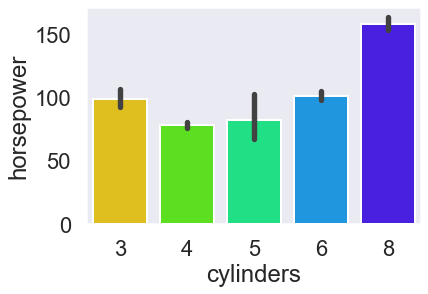

In [146]:
sb.set_palette("hsv")
sb.barplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

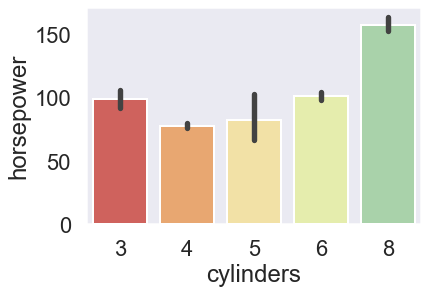

In [147]:
sb.set_palette("Spectral")
sb.barplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

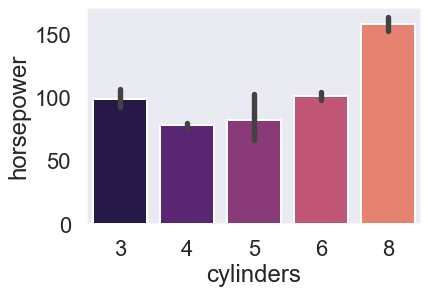

In [148]:
sb.set_palette("magma")
sb.barplot(df['cylinders'],df['horsepower'])

##### Scatter plot can be used to visualize distribution of data

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

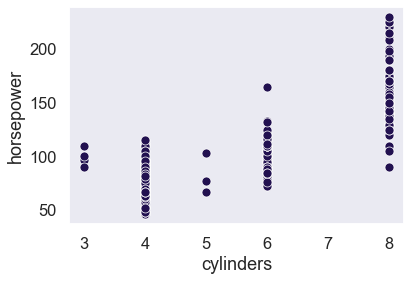

In [151]:
sb.set_context("talk")
sb.scatterplot(df['cylinders'],df['horsepower'])

<AxesSubplot:xlabel='cylinders', ylabel='horsepower'>

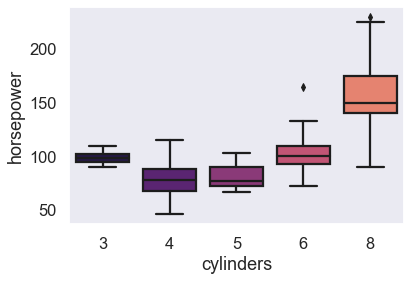

In [152]:
sb.boxplot(df['cylinders'],df['horsepower'])

##### Let's load iris dataset from seaborn

In [153]:
df = sb.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='petal_length', ylabel='Density'>

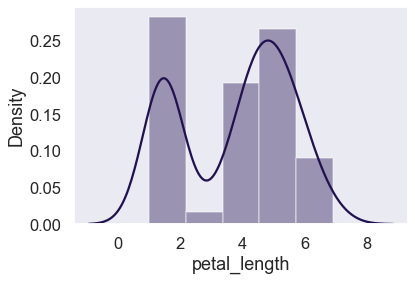

In [154]:
sb.distplot(df['petal_length'])

<AxesSubplot:xlabel='petal_length'>

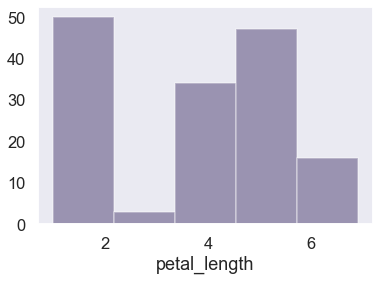

In [155]:
sb.distplot(df['petal_length'],kde = False)

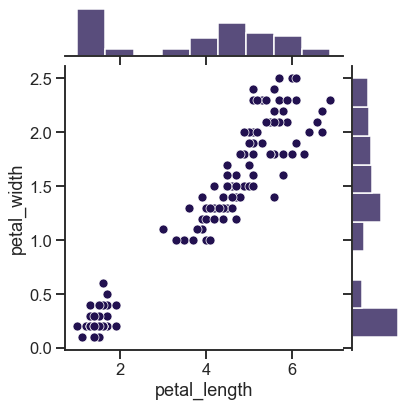

In [157]:
sb.jointplot(x = 'petal_length',y = 'petal_width',data = df)

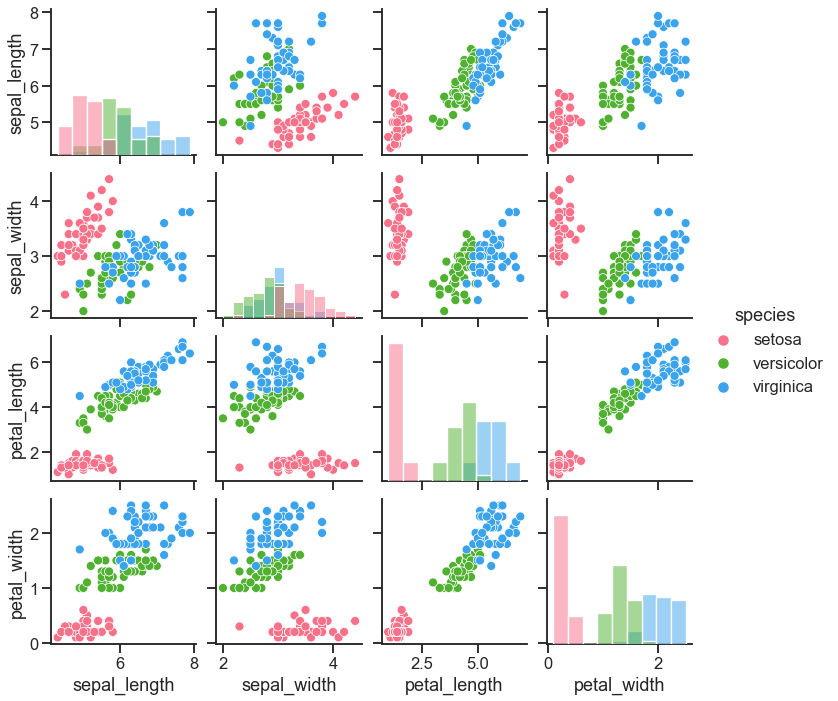

In [156]:
sb.set_style("ticks")
sb.pairplot(df,hue = 'species',diag_kind = "hist",kind = "scatter",palette = "husl")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

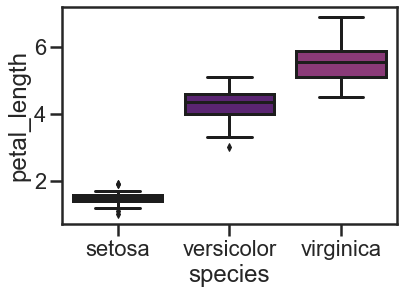

In [120]:
sb.boxplot(x = "species", y = "petal_length", data = df)

Setosa and Versicolor species contains outliers
### Dealing with outliers

<AxesSubplot:xlabel='petal_length'>

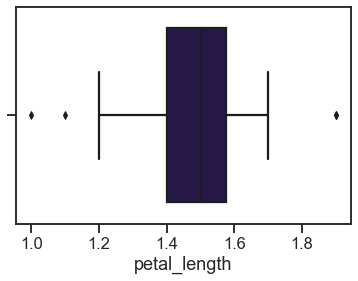

In [159]:
setosa_petal_length = df[df['species'] == 'setosa']['petal_length']
sb.boxplot(setosa_petal_length)

In [161]:
setosa_petal_length = df[df['species'] == 'setosa']['petal_length']

### Identify outliers from iris dataset using InterQuantile Range
Steps
1. Arrange the data in increasing order
2. Calculate first(q1) and third quartile(q3)
3. Find interquartile range (q3-q1)
4. Find lower bound q1*1.5
5. Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

<AxesSubplot:xlabel='petal_length'>

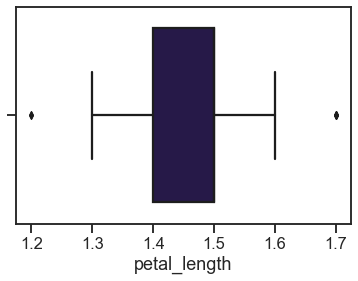

In [162]:
q1,q3 = setosa_petal_length.quantile(.25),setosa_petal_length.quantile(.75)
iqr = q3-q1
lower_bound = (q1 - 1.5*iqr)
upper_bound = (q3 + 1.5*iqr)
mask = (setosa_petal_length >= lower_bound) & (setosa_petal_length <= upper_bound)
setosa_petal_length = setosa_petal_length[mask]
sb.boxplot(setosa_petal_length)